# DeepSea Model for DNA sequence prediction

*Based on the Fall 2021 lab exercise in BioE 231: Introduction to Computational Molecular and Cell Biology 

## Background

- [DeepSea](https://www.nature.com/articles/nmeth.3547) is a convolutional neural network. The paper, as well as a review on deep learning for genomics, can be found on bCourses.
- [Tensorflow basic tutorial](https://www.tensorflow.org/tutorials/quickstart/beginner)
- Stanford course notes on [convolutional neural networks](https://cs231n.github.io/convolutional-networks/)


## Imports

To build the model, we will use Tensorflow, and specifically it's Keras API.

In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

## Load data

In [2]:
!wget https://github.com/bioe131/lab9/raw/main/deepsea10k.tar.gz
!tar -xf "deepsea10k.tar.gz"

--2021-12-22 06:28:41--  https://github.com/bioe131/lab9/raw/main/deepsea10k.tar.gz
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/bioe131/lab9/main/deepsea10k.tar.gz [following]
--2021-12-22 06:28:42--  https://raw.githubusercontent.com/bioe131/lab9/main/deepsea10k.tar.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6036702 (5.8M) [application/octet-stream]
Saving to: ‘deepsea10k.tar.gz’

deepsea10k.tar.gz   100%[===================>]   5.76M  38.1MB/s    in 0.2s    

2021-12-22 06:28:42 (38.1 MB/s) - ‘deepsea10k.tar.gz’ saved [6036702/6036702]



In [4]:
def load_data(path):
    '''
    Loads DeepSEA HDF5 data and reorders the axes.
    
    Returns 
    -------
    (sequences, labels), where the first axis is sample #.
    '''
    with h5py.File(path, 'r') as f:
        sequences = f['trainxdata'][:,:,:]
        labels = f['traindata'][:, :]
    return np.rollaxis(sequences, 2).astype(np.float16), np.rollaxis(labels, 1).astype(np.float16)

## Part 1


In [5]:
sequences, labels = load_data("train10k.mat")

Here we split the data into train and test sets. In machine learning, it's important to hold data out to understand the generalization capability of the model. For this lab we are using scikit-learn for these basic preprocessing steps.

In [6]:
# split into train and test sets


The shape of the data is a three dimensional array. First dimension is the batch size of the sequences, second dimension is the length of the sequences, and the last dimension is the correction


sequence dimension: (10000, 1000, 4)
labels dimension: (10000, 919)


Note that of the 919 different labels, they are split into types:

1. DNase I-hypersensitive sites `range(0, 125)`
2. Transcription factors `range(125, 125 + 690)`
3. Histone Marks `range(125 + 690, 125 + 690 + 104)`

## Part 2

### 2.1 

**Implement and train a basic fully connected network (multilayer perceptron) by completing the SimpleDeepSea class with the following architecture:**

Model Architecture: 
1. Dense layer (2000 units, ‘relu’ activation)
2. BatchNormalization
3. Dropout layer (dropout rate 0.3)
4. Dense layer (2000 units, ‘relu’ activation)
5. BatchNormalization
6. Dropout layer (dropout rate 0.3)
7. Dense layer (919 units, ‘sigmoid’ activation)


You can complete the `SimpleDeepSEA` class, which is partially implemented below. You are encouraged to read the tf.keras docs. For example, dense layers are [here](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense).

In [9]:
# Build the model.

Model: "simple_deep_sea"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           multiple                  0         
                                                                 
 dense (Dense)               multiple                  8002000   
                                                                 
 batch_normalization (BatchN  multiple                 8000      
 ormalization)                                                   
                                                                 
 dropout (Dropout)           multiple                  0         
                                                                 
 dense_1 (Dense)             multiple                  4002000   
                                                                 
 batch_normalization_1 (Batc  multiple                 8000      
 hNormalization)                                   

In [10]:
# Training the model.

Epoch 1/75
211/211 [==============================] - 9s 22ms/step - loss: 0.3269 - val_loss: 0.1221
Epoch 2/75
211/211 [==============================] - 3s 14ms/step - loss: 0.1076 - val_loss: 0.1218
Epoch 3/75
211/211 [==============================] - 3s 12ms/step - loss: 0.1014 - val_loss: 0.1188
Epoch 4/75
211/211 [==============================] - 3s 12ms/step - loss: 0.0956 - val_loss: 0.1141
Epoch 5/75
211/211 [==============================] - 3s 12ms/step - loss: 0.0875 - val_loss: 0.1195
Epoch 6/75
211/211 [==============================] - 3s 12ms/step - loss: 0.0830 - val_loss: 0.1203
Epoch 7/75
211/211 [==============================] - 3s 12ms/step - loss: 0.0769 - val_loss: 0.1210
Epoch 8/75
211/211 [==============================] - 3s 12ms/step - loss: 0.0714 - val_loss: 0.1294
Epoch 9/75
211/211 [==============================] - 3s 12ms/step - loss: 0.0682 - val_loss: 0.1900
Epoch 10/75
211/211 [==============================] - 3s 12ms/step - loss: 0.0640 - val_lo

In [11]:
predictions = model1.predict(X_test) 
print("prediction dimension:",predictions.shape)

prediction dimension: (2500, 919)


## Part 3

**Implement DeepSea by completing the DeepSea class. Below is the model architecture, which can also be found in the Supplementary Note of the DeepSea manuscript.**

Model Architecture: 
1. Convolution layer ( 320 kernels. Window size: 8. Step size: 1. ) 
2. Pooling layer ( Window size: 4. Step size: 4. ) 
3. Convolution layer ( 480 kernels. Window size: 8. Step size: 1. ) 
4. Pooling layer ( Window size: 4. Step size: 4. ) 
5. Convolution layer ( 960 kernels. Window size: 8. Step size: 1. ) 
6. Fully connected layer ( 925 neurons ) 
7. Sigmoid output layer 

Regularization Parameters: 

- Dropout proportion (proportion of outputs randomly set to 0): 
- Layer 2: 20% 
- Layer 4: 20% 
- Layer 5: 50% 
- All other layers: 0%

Also, 
- L2 regularization (5e-07)
- L1 sparsity (1e-08)
- Max kernel norm (0.9)

You can complete the `DeepSEA` class, which is partially implemented below.


Print out the shape of the output tensor after each layer

In [13]:
# Build the model.


shape of input: (None, 1000, 4)
shape of layer 1: (None, 1000, 320)
shape of layer 2: (None, 250, 320)
shape of layer 3: (None, 250, 320)
shape of layer 4: (None, 250, 480)
shape of layer 5: (None, 63, 480)
shape of layer 6: (None, 63, 480)
shape of layer 7: (None, 63, 960)
shape of layer 8: (None, 63, 960)
shape of layer 9: (None, 925)
shape of layer 10: (None, 925)
Model: "deep_sea"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             multiple                  10240     
                                                                 
 flatten_1 (Flatten)         multiple                  0         
                                                                 
 max_pooling1d (MaxPooling1D  multiple                 0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)

In [14]:
# Training the model.


Epoch 1/15
shape of input: (None, 1000, 4)
shape of layer 1: (None, 1000, 320)
shape of layer 2: (None, 250, 320)
shape of layer 3: (None, 250, 320)
shape of layer 4: (None, 250, 480)
shape of layer 5: (None, 63, 480)
shape of layer 6: (None, 63, 480)
shape of layer 7: (None, 63, 960)
shape of layer 8: (None, 63, 960)
shape of layer 9: (None, 925)
shape of layer 10: (None, 925)
shape of input: (None, 1000, 4)
shape of layer 1: (None, 1000, 320)
shape of layer 2: (None, 250, 320)
shape of layer 3: (None, 250, 320)
shape of layer 4: (None, 250, 480)
shape of layer 5: (None, 63, 480)
shape of layer 6: (None, 63, 480)
shape of layer 7: (None, 63, 960)
shape of layer 8: (None, 63, 960)
shape of layer 9: (None, 925)
shape of layer 10: (None, 925)
211/211 [==============================] - ETA: 0s - loss: 0.1158shape of input: (None, 1000, 4)
shape of layer 1: (None, 1000, 320)
shape of layer 2: (None, 250, 320)
shape of layer 3: (None, 250, 320)
shape of layer 4: (None, 250, 480)
shape of la

In [15]:
#define the loss curve function


 history dict:  {'loss': [0.11580819636583328, 0.10093232244253159, 0.10118991136550903, 0.09718345105648041, 0.09569474309682846, 0.09375467151403427, 0.09269516915082932, 0.08989423513412476, 0.0869959369301796, 0.08250106126070023, 0.0794002115726471, 0.07590747624635696, 0.07401944696903229, 0.07291463017463684, 0.07147158682346344], 'val_loss': [0.10193444788455963, 0.10085449367761612, 0.0992700383067131, 0.09635810554027557, 0.09528375416994095, 0.0950949639081955, 0.09822873026132584, 0.09491882473230362, 0.09429134428501129, 0.08997796475887299, 0.08857028186321259, 0.08784417808055878, 0.09232719242572784, 0.08776147663593292, 0.08836561441421509]}


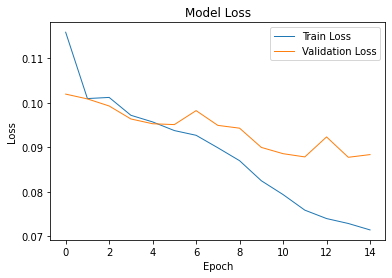

In [16]:
# Plot the loss curve of training and validation, and save the loss value of training and validation.



We are looking whether or not our model converges, not overfitting the data, and smooth (no repetitive, step-like behavior)

### Get predictions

In [17]:
predictions = model2.predict(X_test) 

shape of input: (None, 1000, 4)
shape of layer 1: (None, 1000, 320)
shape of layer 2: (None, 250, 320)
shape of layer 3: (None, 250, 320)
shape of layer 4: (None, 250, 480)
shape of layer 5: (None, 63, 480)
shape of layer 6: (None, 63, 480)
shape of layer 7: (None, 63, 960)
shape of layer 8: (None, 63, 960)
shape of layer 9: (None, 925)
shape of layer 10: (None, 925)


In [18]:
predictions.shape

(2500, 919)

Evaluate how well the classifier has performed. For that we will use something called a [receiver operating characteristic](https://en.wikipedia.org/wiki/Receiver_operating_characteristic) (ROC).


A ROC curve is a graphical representation of how well a binary classifier works as the threshold criteria change. It's great to test hypothesis and visualize the true positive rate vs false positive rate in one plot. 

### Plot an ROC curve for each model (SimpleDeepSea, DeepSea) grouped by "label" class ('Transcription factors', 'DNase I-hypersensitive sites', 'Histone marks').

Note that of the 919 different labels, they are split into types:

1. DNase I-hypersensitive sites `range(0, 125)`
2. Transcription factors `range(125, 125 + 690)`
3. Histone Marks `range(125 + 690, 125 + 690 + 104)`

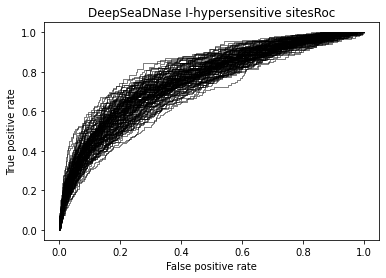

In [20]:
#define the roc curve function and plot DNase I-hypersensitive sites using DeepSea model

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:1001: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:1001: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:1001: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:1001: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:1001: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning,
/usr/local/lib/pytho

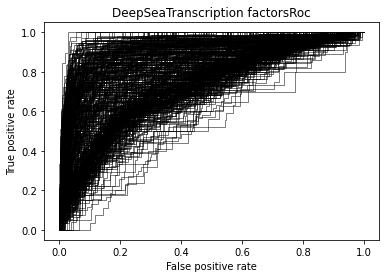

In [21]:
#plot Transcription factors using DeepSea model

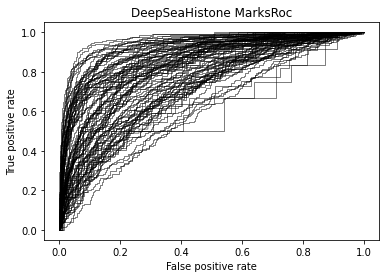

In [22]:
#plot histone marks using DeepSea model

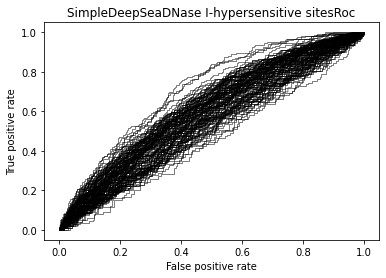

In [23]:
#plot DNase I-hypersensitive sites using SimpleDeepSEA model

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:1001: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:1001: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:1001: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:1001: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:1001: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning,
/usr/local/lib/pytho

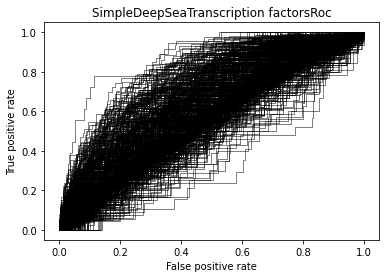

In [24]:
#plot transcription factors using SimpleDeepSEA model

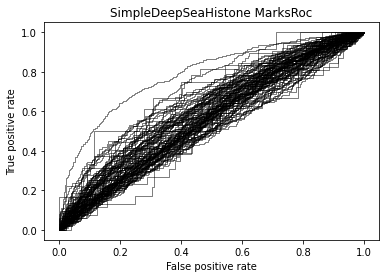

In [25]:
#plot histone marks using SimpleDeepSEA model

### Make a boxplot, grouped by model, and for each "label" class, where the values are the AUROC (area under roc).


In [27]:
#define an area under curve function 

        

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:1001: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:1001: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:1001: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:1001: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:1001: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning,
/usr/local/lib/pytho

,AUC,label,model
0,0.637634,DNase,Simple Deep Sea
1,0.599773,DNase,Simple Deep Sea
2,0.627069,DNase,Simple Deep Sea
3,0.645671,DNase,Simple Deep Sea
4,0.602517,DNase,Simple Deep Sea
...,...,...,...
914,0.829637,Histone Marks,Deep Sea
915,0.906049,Histone Marks,Deep Sea
916,0.943056,Histone Marks,Deep Sea
917,0.804147,Histone Marks,Deep Sea


Text(0.5, 1.0, 'AUROC vs label')

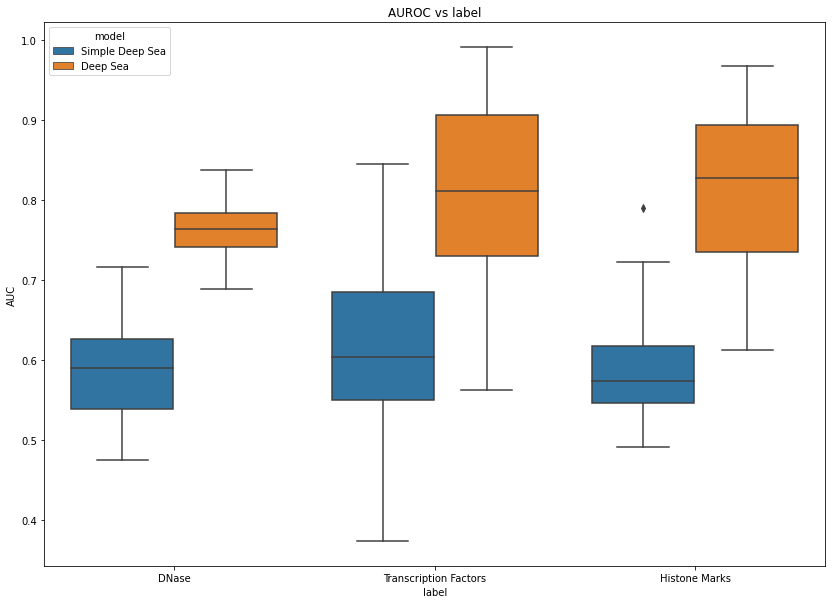

In [29]:
#plotting the boxplot
plt.rcParams['figure.figsize'] = [14, 10]
sns.boxplot(data=all_data,x='label',y='AUC',hue='model').set_title('AUROC vs label')

### 4.4 Write a paragraph commenting on the performance of the models for given "label" classes.

Overall, DeepSea performs better than simpleDeepSea model.
When looking at the ROC curves in all three label classes, DeepSea generates a better true-positive to false-positive ratio, and the majority of the lines are in the upper left hand quadrant, meaning the true-positive is higher than the false-positive most of the time. On the other hand, simpleDeepSea model generates a ratio where true-positive is close to false-positive rate, meaning the model does not perform quite as well.
Showing above is the area under the curve summary boxplot, and again, in all three label classeswe can see that DeepSea model performs better than simpleDeepSea model because the mean of the area under the curve value is higher in DeepSea than in simpleDeepSea. SimpleDeepSea has a wider spread than DeepSea in DNase label, about the same spread in Transcription Factor, and a narrower spread in Histone Marks (with a few upper bound outliers). 